In [2]:
#importing needed libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
%matplotlib inline

In [5]:
path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv"

In [6]:
df=pd.read_csv(path)

In [7]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
# checking the null values
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [10]:
#Data Exploration
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [12]:
#Lets select some features to explore more.
cdf=df[['ENGINESIZE', 'CYLINDERS','CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,CO2EMISSIONS,FUELCONSUMPTION_COMB
0,2.0,4,196,8.5
1,2.4,4,221,9.6
2,1.5,4,136,5.9
3,3.5,6,255,11.1
4,3.5,6,244,10.6
5,3.5,6,230,10.0
6,3.5,6,232,10.1
7,3.7,6,255,11.1
8,3.7,6,267,11.6


array([[<AxesSubplot:title={'center':'ENGINESIZE'}>,
        <AxesSubplot:title={'center':'CYLINDERS'}>],
       [<AxesSubplot:title={'center':'CO2EMISSIONS'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>]],
      dtype=object)

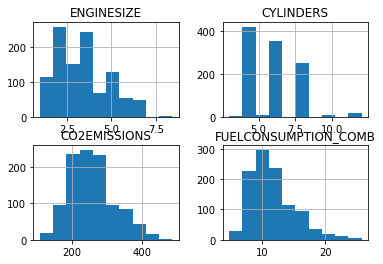

In [13]:
cdf.hist()

In [14]:
import seaborn as sns

<AxesSubplot:xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

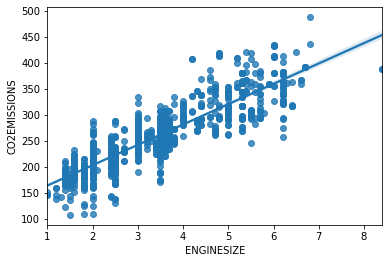

In [17]:
#Regression plot of different independent variables
sns.regplot(x='ENGINESIZE',y='CO2EMISSIONS',data=cdf)

<AxesSubplot:xlabel='CYLINDERS', ylabel='CO2EMISSIONS'>

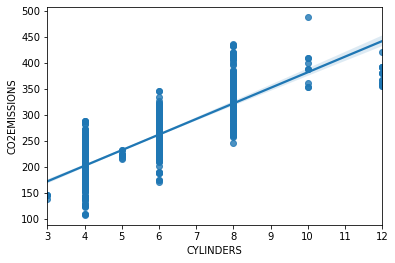

In [18]:
sns.regplot(x='CYLINDERS',y='CO2EMISSIONS',data=cdf)

<AxesSubplot:xlabel='FUELCONSUMPTION_COMB', ylabel='ENGINESIZE'>

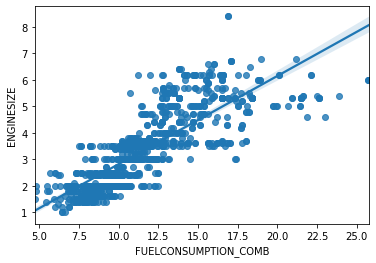

In [19]:
sns.regplot(x='FUELCONSUMPTION_COMB',y='ENGINESIZE',data=cdf)

In [29]:
#Modeling

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [34]:
#let define x and Y

In [48]:
x=df[['ENGINESIZE']]
y=df[['CO2EMISSIONS']]

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [54]:
#fit the model

lr.fit(x_train,y_train)

LinearRegression()

In [79]:
y_pred=lr.predict(x_test)

In [80]:
#coefficients and Intercept
print("coefficientis:",lr.coef_)
print("intercept is:",lr.intercept_)

coefficientis: [[39.38278548]]
intercept is: [124.8515634]


C:\Users\jagvendra.kumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

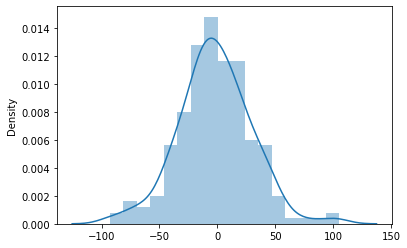

In [81]:
sns.distplot(y_test-y_pred)

<AxesSubplot:xlabel='CO2EMISSIONS'>

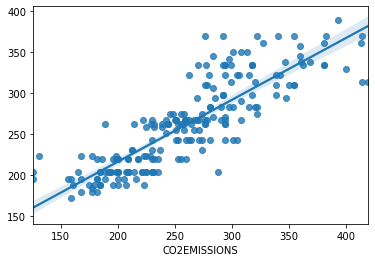

In [87]:
sns.regplot(x=y_test,y=y_pred,data=df)

In [72]:
#Model Evaluation

In [82]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print("mean square error is:",mse)


mean square error is: 999.1260704656038


In [86]:
r_sq=lr.score(y_test,y_pred)
print("r-squred error is:",r_sq)

r-squred error is: -37215.58471502247


In [91]:
x1=df[['FUELCONSUMPTION_COMB']]
y1=df[['CO2EMISSIONS']]

In [92]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3)
lr.fit(x1_train,y1_train)
y1_pred=lr.predict(x1_test)

C:\Users\jagvendra.kumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

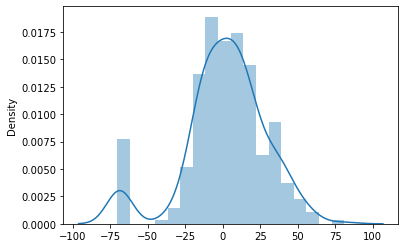

In [94]:
sns.distplot(y1_test-y1_pred)

In [100]:
mse1=mean_squared_error(y1_pred,y1_test)
r_sq1=lr.score(y1_test,y1_pred)
print("mean sqaure error is:",mse1)
print("r sqaure error is:",r_sq1)

mean sqaure error is: 739.1577412680294
r sqaure error is: -5872.12318018704
